In [6]:
import zipfile as zf
files = zf.ZipFile("C://Users//DELL//Downloads//archive (14).zip", 'r')
files.extractall('data')
files.close()

In [7]:
train_dir = 'data/train'
test_dir = 'data/test'

In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import BatchNormalization, RandomFlip,RandomRotation,RandomZoom, Input

from sklearn.model_selection import train_test_split


# Image data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0,1]
    rotation_range=40,         # Rotate images by up to 40 degrees
    width_shift_range=0.2,     # Shift images horizontally (fraction of total width)
    height_shift_range=0.2,    # Shift images vertically (fraction of total height)
    shear_range=0.2,           # Shear intensity (angle in counter-clockwise direction)
    zoom_range=0.2,            # Zoom range [1-zoom_range, 1+zoom_range]
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill in newly created pixels after rotation or width/height shift
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation/test data

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,                # Target directory
    target_size=(224, 224),   # Resize images to 224x224
    batch_size=32,            # Batch size
    class_mode='binary'       # Assuming binary classification
)

# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Show class indices
print("Class indices:", train_generator.class_indices)

# Calculate steps per epoch for training and validation
steps_per_epoch_train = train_generator.samples // train_generator.batch_size
steps_per_epoch_val = validation_generator.samples // validation_generator.batch_size



Found 2637 images belonging to 2 classes.


Found 660 images belonging to 2 classes.
Class indices: {'benign': 0, 'malignant': 1}


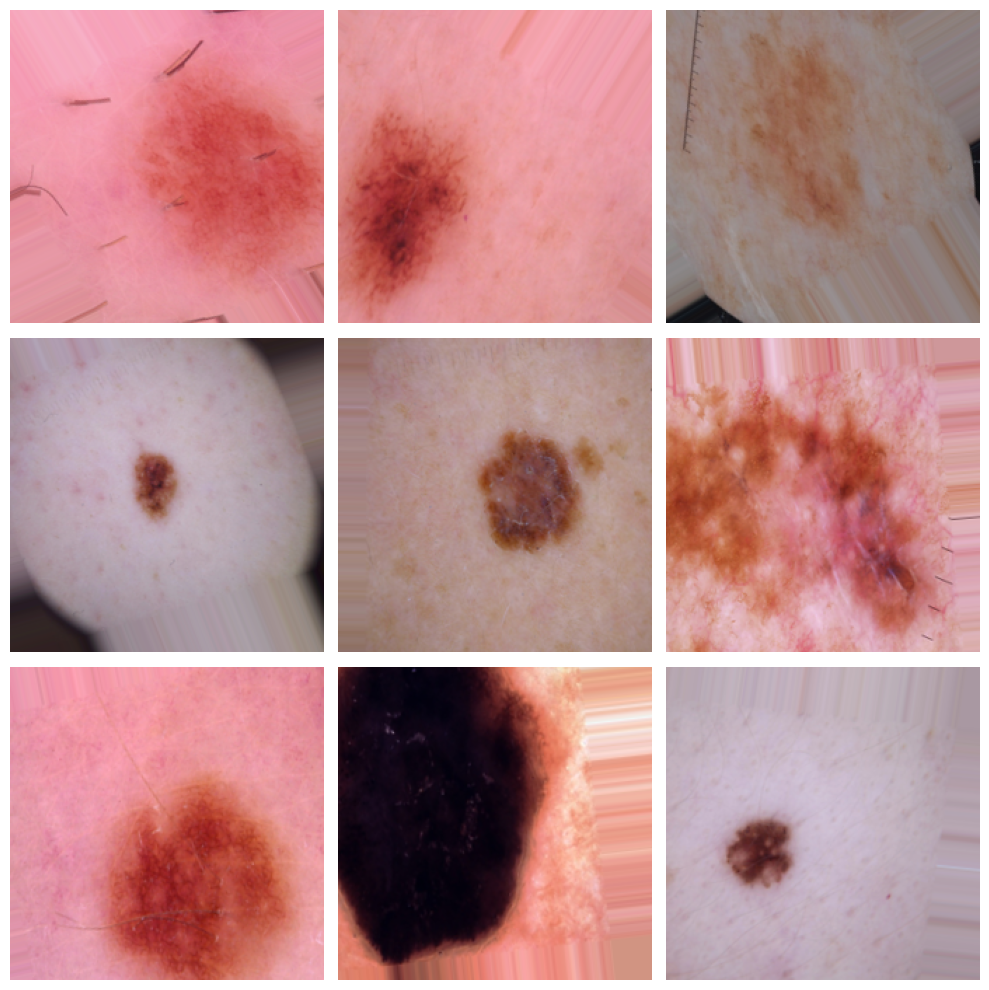

In [9]:
import matplotlib.pyplot as plt

# Visualize some augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = next(train_generator)
    image = batch[0][0]
    plt.imshow(image)
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import tensorflow as tf




# Create base model
model = Sequential()


# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())


# Flatten the output of the convolutional layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
# Define optimizer



opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,528,385 (74.49 MB)

 Trainable params: 19,527,425 (74.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
history=model.fit(train_generator, epochs=5, validation_data=validation_generator)



Epoch 1/5


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be i

83/83 ━━━━━━━━━━━━━━━━━━━━ 62s 691ms/step - accuracy: 0.4639 - loss: 0.0000e+00 - val_accuracy: 0.4545 - val_loss: 0.0000e+00
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 494ms/step - accuracy: 0.4574 - loss: 0.0000e+00 - val_accuracy: 0.4545 - val_loss: 0.0000e+00
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 43s 495ms/step - accuracy: 0.4504 - loss: 0.0000e+00 - val_accuracy: 0.4545 - val_loss: 0.0000e+00
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 493ms/step - accuracy: 0.4530 - loss: 0.0000e+00 - val_accuracy: 0.4545 - val_loss: 0.0000e+00
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 42s 484ms/step - accuracy: 0.4523 - loss: 0.0000e+00 - val_accuracy: 0.4545 - val_loss: 0.0000e+00


In [13]:

# Make predictions on test data
predictions = model.predict(validation_generator)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype('int32')

# Display some example predictions
for i in range(10):
    print(f"Prediction: {predicted_classes[i]}, Probability: {predictions[i]}")



 1/21 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]


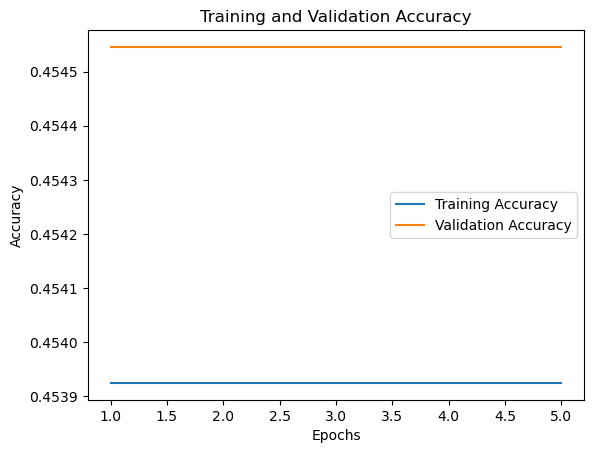

In [14]:
import matplotlib.pyplot as plt

# Get training and validation accuracy from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

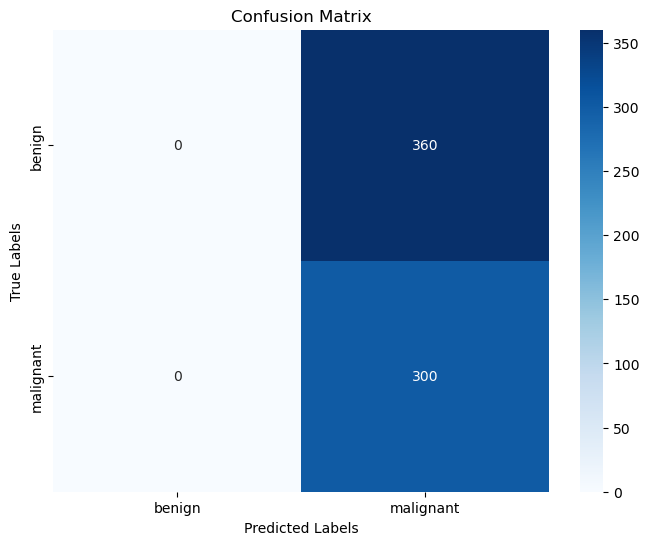

In [15]:





import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get true labels
true_labels = validation_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=train_generator.class_indices.keys(), 
            yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [16]:

# VGG 16 Model
from tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

In [17]:
for layer in model_vgg16.layers:
   layer.trainable=False
model_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
model1 = Sequential()
model1.add(model_vgg16)
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)


# Compile the model
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
history = model1.fit(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6034 - loss: 0.6733 - val_accuracy: 0.7758 - val_loss: 0.4437
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.7658 - loss: 0.4943 - val_accuracy: 0.8364 - val_loss: 0.3795
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8052 - loss: 0.4311 - val_accuracy: 0.8197 - val_loss: 0.3794
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8024 - loss: 0.4288 - val_accuracy: 0.8455 - val_loss: 0.3564
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8190 - loss: 0.3927 - val_accuracy: 0.8439 - val_loss: 0.3569


In [20]:

# Make predictions on test data
predictions1 = model1.predict(validation_generator)

# Convert probabilities to class labels (0 or 1)
predicted_classes1 = (predictions > 0.5).astype('int32')

# Display some example predictions
for i in range(10):
    print(f"Prediction: {predicted_classes[i]}, Probability: {predictions[i]}")



21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]
Prediction: [1], Probability: [1.]


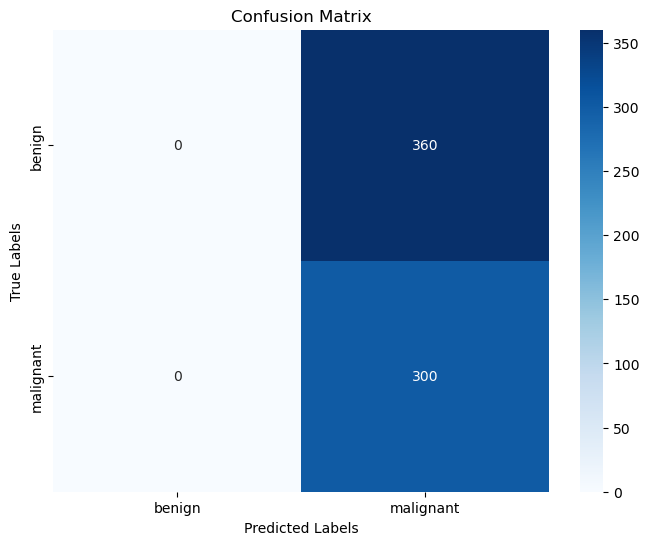

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=train_generator.class_indices.keys(), 
            yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


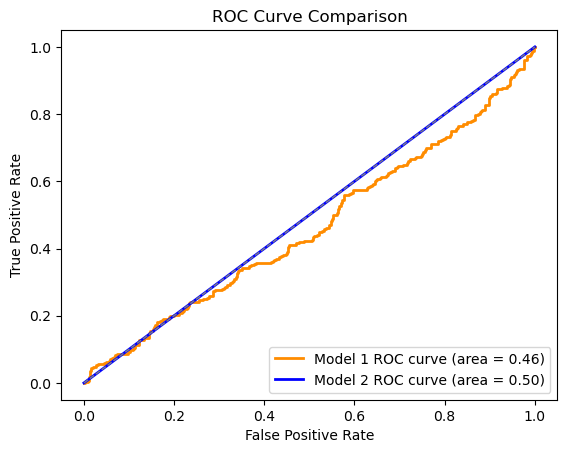

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for model 1
fpr1, tpr1, _ = roc_curve(true_labels, predictions1)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve and ROC area for model 2
fpr2, tpr2, _ = roc_curve(true_labels, predictions)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curves
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Model 1 ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Model 2 ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()
